In [33]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'/Users/xuzhejia/Desktop/NBA/資料/模型資料.csv')

In [7]:
data

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,當年有無入選,position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F
0,1.094510,1.649376,0.134126,1.925410,4.505336,3.811247,-0.018850,5.078244,0.528366,5.603387,...,1,G,0,0,0,0,0,0,1,0
1,1.055059,1.329987,0.413128,1.936672,3.169860,3.041891,-0.061294,3.453361,0.655550,3.159557,...,1,F,0,0,0,1,0,0,0,0
2,0.857806,1.968765,-0.633132,1.474930,3.120398,2.228571,1.424239,0.108012,-0.262999,4.686950,...,1,F,0,0,0,1,0,0,0,0
3,0.542200,1.138354,-0.284378,1.576288,3.087424,2.536314,0.426810,0.729291,0.047895,5.053525,...,1,F-C,0,1,0,0,0,0,0,0
4,0.187144,0.180187,0.134126,1.745218,3.070936,2.800093,0.702694,1.589524,0.323459,3.526131,...,1,F,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,-1.686194,-1.359008,-1.467456,-1.831638,-1.320765,-1.200413,-2.831379,-0.866649,-2.087330,-1.059125,...,0,F-C,0,0,0,0,1,0,0,0
4017,-1.775606,-1.359008,-1.627105,-1.743743,-1.383718,-1.432165,-4.167086,-1.228034,-2.087330,-1.059125,...,0,F,0,0,0,1,0,0,0,0
4018,-1.865018,-1.499590,-1.627105,-1.853612,-1.383718,-1.495370,-4.167086,-1.228034,-2.087330,-1.059125,...,0,C,0,1,0,0,0,0,0,0
4019,-1.730900,-1.288717,-1.627105,-1.743743,-1.383718,-1.326823,-4.167086,-1.092515,-2.087330,-1.059125,...,0,F,0,0,0,1,0,0,0,0


In [23]:

x = data.loc[:,['GP', 'W', 'L','MIN', 'PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2',
       'TD3', '+/-', '累積前三隊', '勝率', 'DFG_percent', 'DIFF_percent', '是否首次入選', 'C', 'C-F', 'F', 'F-C', 'F-G',
       'G', 'G-F']]
y = data.loc[:,'當年有無入選']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 43)

In [25]:
x_train

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,DFG_percent,DIFF_percent,是否首次入選,C,C-F,F,F-C,F-G,G,G-F
1837,0.531089,0.638127,0.171329,0.521080,-0.545196,-0.430036,0.268439,-0.954147,-0.995361,-0.746809,...,-0.003937,-0.112126,0,0,0,1,0,0,0,0
1361,-0.777837,-0.886576,-0.336934,-1.186090,-0.639912,-0.728241,0.202970,-0.617287,1.547428,-0.356250,...,0.822495,0.961002,0,0,0,0,0,0,1,0
433,-0.483518,-0.522469,-0.284378,-0.631062,-0.886028,-0.826873,-0.973836,-0.274313,0.252802,-0.811667,...,0.346965,0.418652,0,0,0,0,0,1,0,0
151,0.266045,0.052431,0.413128,0.799211,0.350523,0.448061,-0.326568,0.968245,0.372919,0.226961,...,0.283428,0.364268,0,0,0,0,0,0,1,0
1556,-0.970565,-1.406642,-0.039881,1.056438,1.594192,1.758763,-0.304778,1.570018,0.028775,2.585099,...,1.059946,0.969704,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,0.537757,0.256017,0.683229,0.363592,-0.417977,-0.292707,-0.310763,0.117434,0.080950,-0.600093,...,-0.306994,-0.413235,0,0,0,1,0,0,0,0
3889,-1.328548,-0.866970,-1.387632,-0.128676,-0.722719,-0.463021,-1.103368,-0.098708,-0.393931,-0.769711,...,-1.340871,-1.197696,0,0,0,0,0,0,1,0
2303,-0.830614,-1.206281,-0.117718,0.634945,-0.340622,0.102013,-0.945312,-0.014618,-0.194324,-0.661418,...,-0.470260,-0.247207,0,0,0,0,0,0,1,0
3392,0.318892,0.196225,0.289795,-1.065114,-0.840966,-0.847345,-0.212718,-0.367717,0.282997,-0.688887,...,0.792979,0.629818,0,0,0,1,0,0,0,0


In [26]:
logistic = LogisticRegression(penalty = 'l2',fit_intercept=True)

In [27]:
logistic.fit(x_train.values,y_train.values)

LogisticRegression()

In [31]:
proba = logistic.predict_proba(x_train.values)[:,1]

In [36]:
pro = []
for x in proba:
    pro.append(round(x,2))
np.array(pro)

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
df = pd.DataFrame([pro,y_train]).T

In [68]:
df = pd.DataFrame(df.groupby(1)[0].value_counts())

In [69]:
opportunity = []
classify = []
for x in  df.index:
    opportunity.append(x[1])
    classify.append(x[0])
df['opportunity'] = opportunity
df['classify'] = classify

In [70]:
df

0  opportunity  classify
1   0                                
0.0 0.00  2578         0.00       0.0
    0.01    48         0.01       0.0
    0.02    22         0.02       0.0
    0.03     8         0.03       0.0
    0.05     8         0.05       0.0
...        ...          ...       ...
1.0 0.78     1         0.78       1.0
    0.85     1         0.85       1.0
    0.89     1         0.89       1.0
    0.90     1         0.90       1.0
    0.94     1         0.94       1.0

[72 rows x 3 columns]

In [100]:
df['opportunity'].values[np.where(df['classify'] == 0)[0]]

array([0.  , 0.01, 0.02, 0.03, 0.05, 0.07, 0.06, 0.04, 0.09, 0.1 , 0.08,
       0.15, 0.13, 0.17, 0.18, 0.23, 0.24, 0.26, 0.37, 0.11, 0.12, 0.14,
       0.16, 0.19, 0.2 , 0.22, 0.29, 0.31, 0.32, 0.33, 0.34, 0.35, 0.47,
       0.67, 0.69, 0.7 , 0.86])

<BarContainer object of 35 artists>

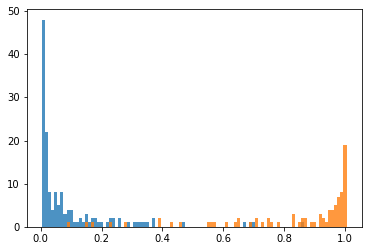

In [108]:
plt.bar(df['opportunity'].values[np.where(df['classify'] == 0)[0][1:]],df[0].values[np.where(df['classify'] == 0)[0][1:]],width = 0.01,alpha = 0.8)
plt.bar(df['opportunity'].values[np.where(df['classify'] == 1)[0]],df[0].values[np.where(df['classify'] == 1)[0]],width = 0.01,alpha = 0.8)

In [115]:
y_label = y_train.values
y_pre = pro
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [117]:
matrix = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(y_train.values,l))
    p = pd.DataFrame(confusion_matrix(y_train.values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 2.0
          predict 0  predict 1
actual 0       2727          0
actual 1         87          0
thersholds: 1.0
          predict 0  predict 1
actual 0       2727          0
actual 1         87          0
thersholds: 0.99
          predict 0  predict 1
actual 0       2727          0
actual 1         62         25
thersholds: 0.98
          predict 0  predict 1
actual 0       2727          0
actual 1         56         31
thersholds: 0.97
          predict 0  predict 1
actual 0       2727          0
actual 1         52         35
thersholds: 0.95
          predict 0  predict 1
actual 0       2727          0
actual 1         43         44
thersholds: 0.94
          predict 0  predict 1
actual 0       2727          0
actual 1         39         48
thersholds: 0.93
          predict 0  predict 1
actual 0       2727          0
actual 1         38         49
thersholds: 0.92
          predict 0  predict 1
actual 0       2727          0
actual 1         36         51
thersholds: 

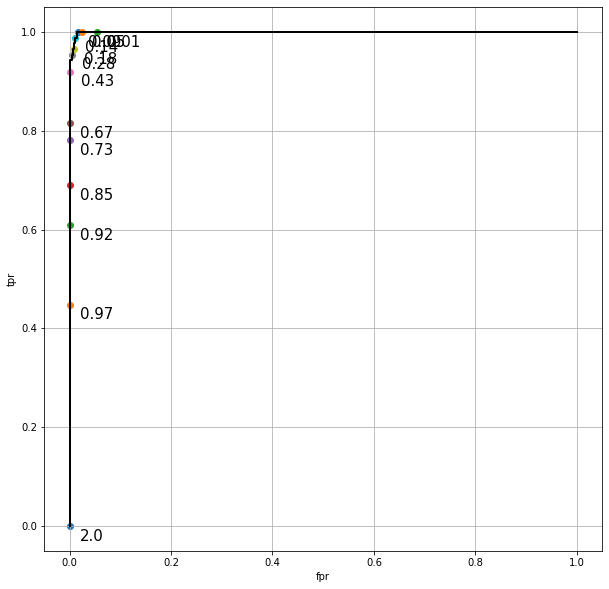

In [120]:
plt.figure(figsize=(10,10))
plt.grid(which = 'both')
plt.step(fpr,tpr, 'k', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
for x in range(0,52,4):
    plt.scatter(fpr[x],tpr[x])
    plt.text(fpr[x]+0.02,tpr[x]-0.03,thersholds[x],size=15)

In [124]:
prob_1 = logistic.predict_proba(x_test)[:,1]

In [149]:
df = pd.DataFrame([y_test.values,prob_1]).T
prob = []
for x in df[1].values:
    prob.append(round(x,2))
df['prob'] = prob

In [151]:
df = pd.DataFrame(df.groupby(0)['prob'].value_counts())

In [152]:
opportunity = []
classify = []
for x in  df.index:
    opportunity.append(x[1])
    classify.append(x[0])
df['opportunity'] = opportunity
df['classify'] = classify
df

prob  opportunity  classify
0   prob                             
0.0 0.00  1107         0.00       0.0
    0.01    19         0.01       0.0
    0.02     7         0.02       0.0
    0.03     5         0.03       0.0
    0.06     5         0.06       0.0
    0.05     4         0.05       0.0
    0.04     3         0.04       0.0
    0.07     3         0.07       0.0
    0.08     2         0.08       0.0
    0.13     2         0.13       0.0
    0.09     1         0.09       0.0
    0.11     1         0.11       0.0
    0.12     1         0.12       0.0
    0.14     1         0.14       0.0
    0.16     1         0.16       0.0
    0.17     1         0.17       0.0
    0.19     1         0.19       0.0
    0.23     1         0.23       0.0
    0.28     1         0.28       0.0
    0.31     1         0.31       0.0
    0.46     1         0.46       0.0
    0.54     1         0.54       0.0
    0.79     1         0.79       0.0
    0.81     1         0.81       0.0
    0.85     1         0.85       0.0
    0.89     1         0.89       0.0
    0.92     1         0.92       0.0
1.0 1.00     8         1.00       1.0
    0.64     2         0.64       1.0
    0.78     2         0.78       1.0
    0.80     2         0.80       1.0
    0.84     2         0.84       1.0
    0.93     2         0.93       1.0
    0.97     2         0.97       1.0
    0.99     2         0.99       1.0
    0.01     1         0.01       1.0
    0.16     1         0.16       1.0
    0.44     1         0.44       1.0
    0.59     1         0.59       1.0
    0.62     1         0.62       1.0
    0.73     1         0.73       1.0
    0.85     1         0.85       1.0
    0.86     1         0.86       1.0
    0.90     1         0.90       1.0
    0.91     1         0.91       1.0
    0.98     1         0.98       1.0

<BarContainer object of 19 artists>

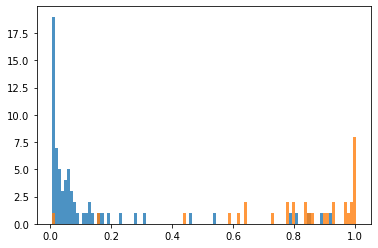

In [154]:
plt.bar(df['opportunity'].values[np.where(df['classify'].values == 0)[0][1:]],df['prob'].values[np.where(df['classify'].values == 0)[0][1:]],width = 0.01,alpha = 0.8)
plt.bar(df['opportunity'].values[np.where(df['classify'].values == 1)[0]],df['prob'].values[np.where(df['classify'].values== 1)[0]],width = 0.01,alpha = 0.8)

In [156]:
y_label = y_test.values
y_pre = prob_1
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [157]:
matrix = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in prob_1:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(y_test.values,l))
    p = pd.DataFrame(confusion_matrix(y_test.values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 1.9998714567687643
          predict 0  predict 1
actual 0       1174          0
actual 1         33          0
thersholds: 0.9998714567687643
          predict 0  predict 1
actual 0       1174          0
actual 1         32          1
thersholds: 0.9260321715449681
          predict 0  predict 1
actual 0       1174          0
actual 1         18         15
thersholds: 0.9180475073841693
          predict 0  predict 1
actual 0       1173          1
actual 1         18         15
thersholds: 0.9011868355280035
          predict 0  predict 1
actual 0       1173          1
actual 1         16         17
thersholds: 0.8883109624388434
          predict 0  predict 1
actual 0       1172          2
actual 1         16         17
thersholds: 0.8485264672022332
          predict 0  predict 1
actual 0       1172          2
actual 1         14         19
thersholds: 0.8482559258810085
          predict 0  predict 1
actual 0       1171          3
actual 1         14         19
thershol

In [199]:
x_test['prob'] = prob
x_test

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,DIFF_percent,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
1670,0.989928,1.505605,-0.039881,1.145664,0.350787,0.338372,0.172903,0.560352,0.925688,-0.118147,...,1.080920,0,0,0,0,0,0,1,0,0.0
1630,-1.429403,-1.406642,-0.814316,1.067591,0.679924,0.454798,-0.209242,0.784722,0.728494,1.642106,...,-0.203121,0,0,0,0,0,0,1,0,0.0
882,-0.289474,-0.296530,-0.191860,-1.037279,-0.639250,-0.881602,2.248687,-1.152602,1.375791,-0.271694,...,-0.516179,0,1,0,0,0,0,0,0,0.0
1699,1.198491,-0.105425,2.142619,1.112204,0.131363,0.384942,-0.071245,-0.785869,0.035136,0.447648,...,0.625945,0,0,0,0,0,0,1,0,0.0
3466,-1.624298,-1.338823,-1.108188,-1.252387,-1.178471,-1.052090,-1.850215,-0.582476,-0.028782,-1.053023,...,-0.702105,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,0.146794,0.179054,0.060270,0.634945,0.309161,0.351311,-0.251274,0.733675,0.274386,0.442433,...,0.049273,0,0,0,1,0,0,0,0,0.0
1870,0.322526,0.080463,0.452942,-0.170424,-0.709764,-0.802598,1.276878,-1.066332,-1.631470,-0.118147,...,-0.637875,0,1,0,0,0,0,0,0,0.0
352,0.542200,1.202231,-0.354129,-0.507180,-0.622231,-0.651020,-0.390233,-0.083150,0.189210,-0.322901,...,-0.378973,0,0,0,1,0,0,0,0,0.0
3654,0.906743,1.312058,0.129029,0.772246,0.331731,0.105824,1.362552,-1.228034,0.242843,0.793129,...,-0.462454,0,1,0,0,0,0,0,0,0.0


In [197]:
x_train['prob'] = pro

In [198]:
x_train

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,DIFF_percent,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
1837,0.531089,0.638127,0.171329,0.521080,-0.545196,-0.430036,0.268439,-0.954147,-0.995361,-0.746809,...,-0.112126,0,0,0,1,0,0,0,0,0.0
1361,-0.777837,-0.886576,-0.336934,-1.186090,-0.639912,-0.728241,0.202970,-0.617287,1.547428,-0.356250,...,0.961002,0,0,0,0,0,0,1,0,0.0
433,-0.483518,-0.522469,-0.284378,-0.631062,-0.886028,-0.826873,-0.973836,-0.274313,0.252802,-0.811667,...,0.418652,0,0,0,0,0,1,0,0,0.0
151,0.266045,0.052431,0.413128,0.799211,0.350523,0.448061,-0.326568,0.968245,0.372919,0.226961,...,0.364268,0,0,0,0,0,0,1,0,0.0
1556,-0.970565,-1.406642,-0.039881,1.056438,1.594192,1.758763,-0.304778,1.570018,0.028775,2.585099,...,0.969704,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,0.537757,0.256017,0.683229,0.363592,-0.417977,-0.292707,-0.310763,0.117434,0.080950,-0.600093,...,-0.413235,0,0,0,1,0,0,0,0,0.0
3889,-1.328548,-0.866970,-1.387632,-0.128676,-0.722719,-0.463021,-1.103368,-0.098708,-0.393931,-0.769711,...,-1.197696,0,0,0,0,0,0,1,0,0.0
2303,-0.830614,-1.206281,-0.117718,0.634945,-0.340622,0.102013,-0.945312,-0.014618,-0.194324,-0.661418,...,-0.247207,0,0,0,0,0,0,1,0,0.0
3392,0.318892,0.196225,0.289795,-1.065114,-0.840966,-0.847345,-0.212718,-0.367717,0.282997,-0.688887,...,0.629818,0,0,0,1,0,0,0,0,0.0


In [202]:
final = pd.concat([x_train,x_test])

In [204]:
ans = data.merge(final,left_index = True,right_index=True)
ans

,GP_x,W_x,L_x,MIN_x,PTS_x,FGA_x,FG%_x,3PA_x,3P%_x,FTA_x,...,DIFF_percent_y,是否首次入選_y,C_y,C-F_y,F_y,F-C_y,F-G_y,G_y,G-F_y,prob
0,1.094510,1.649376,0.134126,1.925410,4.505336,3.811247,-0.018850,5.078244,0.528366,5.603387,...,-0.224886,0,0,0,0,0,0,1,0,1.00
1,1.055059,1.329987,0.413128,1.936672,3.169860,3.041891,-0.061294,3.453361,0.655550,3.159557,...,-0.333653,0,0,0,1,0,0,0,0,0.99
2,0.857806,1.968765,-0.633132,1.474930,3.120398,2.228571,1.424239,0.108012,-0.262999,4.686950,...,-0.741530,0,0,0,1,0,0,0,0,1.00
3,0.542200,1.138354,-0.284378,1.576288,3.087424,2.536314,0.426810,0.729291,0.047895,5.053525,...,-0.886552,0,1,0,0,0,0,0,0,0.96
4,0.187144,0.180187,0.134126,1.745218,3.070936,2.800093,0.702694,1.589524,0.323459,3.526131,...,-0.279270,0,0,0,1,0,0,0,0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,-1.686194,-1.359008,-1.467456,-1.831638,-1.320765,-1.200413,-2.831379,-0.866649,-2.087330,-1.059125,...,-2.707392,0,0,0,0,1,0,0,0,0.00
4017,-1.775606,-1.359008,-1.627105,-1.743743,-1.383718,-1.432165,-4.167086,-1.228034,-2.087330,-1.059125,...,-1.442776,0,0,0,1,0,0,0,0,0.00
4018,-1.865018,-1.499590,-1.627105,-1.853612,-1.383718,-1.495370,-4.167086,-1.228034,-2.087330,-1.059125,...,-4.991544,0,1,0,0,0,0,0,0,0.00
4019,-1.730900,-1.288717,-1.627105,-1.743743,-1.383718,-1.326823,-4.167086,-1.092515,-2.087330,-1.059125,...,-2.874047,0,0,0,1,0,0,0,0,0.00


In [206]:
ans = ans.T.drop_duplicates().T
ans

,GP_x,W_x,L_x,MIN_x,PTS_x,FGA_x,FG%_x,3PA_x,3P%_x,FTA_x,...,position,是否首次入選_x,C_x,C-F_x,F_x,F-C_x,F-G_x,G_x,G-F_x,prob
0,1.09451,1.649376,0.134126,1.92541,4.505336,3.811247,-0.01885,5.078244,0.528366,5.603387,...,G,0,0,0,0,0,0,1,0,1.0
1,1.055059,1.329987,0.413128,1.936672,3.16986,3.041891,-0.061294,3.453361,0.65555,3.159557,...,F,0,0,0,1,0,0,0,0,0.99
2,0.857806,1.968765,-0.633132,1.47493,3.120398,2.228571,1.424239,0.108012,-0.262999,4.68695,...,F,0,0,0,1,0,0,0,0,1.0
3,0.5422,1.138354,-0.284378,1.576288,3.087424,2.536314,0.42681,0.729291,0.047895,5.053525,...,F-C,0,1,0,0,0,0,0,0,0.96
4,0.187144,0.180187,0.134126,1.745218,3.070936,2.800093,0.702694,1.589524,0.323459,3.526131,...,F,0,0,0,1,0,0,0,0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,-1.686194,-1.359008,-1.467456,-1.831638,-1.320765,-1.200413,-2.831379,-0.866649,-2.08733,-1.059125,...,F-C,0,0,0,0,1,0,0,0,0.0
4017,-1.775606,-1.359008,-1.627105,-1.743743,-1.383718,-1.432165,-4.167086,-1.228034,-2.08733,-1.059125,...,F,0,0,0,1,0,0,0,0,0.0
4018,-1.865018,-1.49959,-1.627105,-1.853612,-1.383718,-1.49537,-4.167086,-1.228034,-2.08733,-1.059125,...,C,0,1,0,0,0,0,0,0,0.0
4019,-1.7309,-1.288717,-1.627105,-1.743743,-1.383718,-1.326823,-4.167086,-1.092515,-2.08733,-1.059125,...,F,0,0,0,1,0,0,0,0,0.0


In [229]:
ans_group_by_position = ans.groupby('position')
for x,y in ans_group_by_position:
    print(x)
    print(ans_group_by_position.get_group(x).sort_values('prob',ascending=False).head(6).loc[:,'Player'])
    print(ans_group_by_position.get_group(x).sort_values('prob',ascending=False).head(6).loc[:,'prob'])
    print(ans_group_by_position.get_group(x).sort_values('prob',ascending=False).head(6).loc[:,'當年有無入選'])

C
2020          Nikola Jokic
31            Nikola Jokic
1643        DeAndre Jordan
542     Karl-Anthony Towns
2105           Rudy Gobert
2620           Rudy Gobert
Name: Player, dtype: object
2020     1.0
31      0.98
1643    0.98
542     0.97
2105    0.96
2620    0.93
Name: prob, dtype: object
2020    1
31      1
1643    1
542     1
2105    1
2620    1
Name: 當年有無入選, dtype: object
C-F
2011          Joel Embiid
1075        Dwight Howard
3030     DeMarcus Cousins
21      LaMarcus Aldridge
3570          Bam Adebayo
1582           Al Horford
Name: Player, dtype: object
2011    0.97
1075    0.71
3030    0.59
21      0.28
3570     0.1
1582    0.09
Name: prob, dtype: object
2011    1
1075    1
3030    1
21      0
3570    0
1582    0
Name: 當年有無入選, dtype: object
F
3501    Giannis Antetokounmpo
1522             LeBron James
2556             Kevin Durant
3106           Draymond Green
2       Giannis Antetokounmpo
3042            Kawhi Leonard
Name: Player, dtype: object
3501    1.0
1522    1.0
25

In [261]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/NBA/資料/今年資料.csv')
df

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,position,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F
0,0.938670,1.489091,0.065084,1.518321,3.519689,2.648595,0.497309,0.416571,0.581259,6.289735,...,C-F,C-F,0,0,1,0,0,0,0,0
1,0.458649,0.169472,0.645377,1.878668,3.471913,3.107778,0.703385,2.314415,0.492559,2.682395,...,F,F,0,0,0,1,0,0,0,0
2,0.898668,1.489091,-0.007452,1.422935,3.408213,2.439875,0.942435,0.372435,0.004708,6.040953,...,F,F,0,0,0,1,0,0,0,0
3,0.418648,0.895262,-0.225062,1.878668,3.408213,2.794699,0.653927,1.211017,0.669959,3.553132,...,F,F,0,0,0,1,0,0,0,0
4,0.818665,1.423110,-0.079989,1.687896,3.169335,3.066034,0.151100,2.667503,0.448209,3.615328,...,F-G,F-G,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-1.621438,-1.480053,-1.313111,-1.523438,-1.353425,-1.275334,-3.615985,-0.995779,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0
580,-1.661440,-1.282110,-1.603257,-1.788400,-1.353425,-1.379694,-3.615985,-1.216459,-2.161053,-0.613968,...,C,C,0,1,0,0,0,0,0,0
581,-1.741443,-1.414072,-1.603257,-1.851991,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0
582,-1.741443,-1.414072,-1.603257,-1.968574,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0


In [262]:
x = df.loc[:,['GP', 'W', 'L', 'MIN', 'PTS', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2',
       'TD3', '+/-', '累積前三隊', '勝率', 'DFG_percent', 'DIFF_percent', '是否首次入選', 'C', 'C-F', 'F', 'F-C', 'F-G',
       'G', 'G-F']]
x = x.dropna()

In [263]:
x

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,DFG_percent,DIFF_percent,是否首次入選,C,C-F,F,F-C,F-G,G,G-F
0,0.938670,1.489091,0.065084,1.518321,3.519689,2.648595,0.497309,0.416571,0.581259,6.289735,...,-0.211406,-0.421241,0,0,1,0,0,0,0,0
1,0.458649,0.169472,0.645377,1.878668,3.471913,3.107778,0.703385,2.314415,0.492559,2.682395,...,-0.454887,-0.547432,0,0,0,1,0,0,0,0
2,0.898668,1.489091,-0.007452,1.422935,3.408213,2.439875,0.942435,0.372435,0.004708,6.040953,...,-0.527931,-0.690448,0,0,0,1,0,0,0,0
3,0.418648,0.895262,-0.225062,1.878668,3.408213,2.794699,0.653927,1.211017,0.669959,3.553132,...,-0.406191,-0.496956,0,0,0,1,0,0,0,0
4,0.818665,1.423110,-0.079989,1.687896,3.169335,3.066034,0.151100,2.667503,0.448209,3.615328,...,0.145699,0.108760,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-1.621438,-1.480053,-1.313111,-1.523438,-1.353425,-1.275334,-3.615985,-0.995779,-2.161053,-1.049336,...,-3.498398,-3.189027,0,0,0,1,0,0,0,0
580,-1.661440,-1.282110,-1.603257,-1.788400,-1.353425,-1.379694,-3.615985,-1.216459,-2.161053,-0.613968,...,3.457040,3.827184,0,1,0,0,0,0,0,0
581,-1.741443,-1.414072,-1.603257,-1.851991,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,3.457040,3.507501,0,0,0,1,0,0,0,0
582,-1.741443,-1.414072,-1.603257,-1.968574,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,-4.658991,-4.139665,0,0,0,1,0,0,0,0


In [264]:
proba = logistic.predict_proba(x.values)[:,1]

In [265]:
df = df.dropna()
df['prob'] = proba

In [266]:
df

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
0,0.938670,1.489091,0.065084,1.518321,3.519689,2.648595,0.497309,0.416571,0.581259,6.289735,...,C-F,0,0,1,0,0,0,0,0,9.973322e-01
1,0.458649,0.169472,0.645377,1.878668,3.471913,3.107778,0.703385,2.314415,0.492559,2.682395,...,F,0,0,0,1,0,0,0,0,9.836631e-01
2,0.898668,1.489091,-0.007452,1.422935,3.408213,2.439875,0.942435,0.372435,0.004708,6.040953,...,F,0,0,0,1,0,0,0,0,9.995893e-01
3,0.418648,0.895262,-0.225062,1.878668,3.408213,2.794699,0.653927,1.211017,0.669959,3.553132,...,F,0,0,0,1,0,0,0,0,9.798463e-01
4,0.818665,1.423110,-0.079989,1.687896,3.169335,3.066034,0.151100,2.667503,0.448209,3.615328,...,F-G,0,0,0,0,0,1,0,0,9.465499e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-1.621438,-1.480053,-1.313111,-1.523438,-1.353425,-1.275334,-3.615985,-0.995779,-2.161053,-1.049336,...,F,0,0,0,1,0,0,0,0,1.375053e-11
580,-1.661440,-1.282110,-1.603257,-1.788400,-1.353425,-1.379694,-3.615985,-1.216459,-2.161053,-0.613968,...,C,0,1,0,0,0,0,0,0,6.389587e-14
581,-1.741443,-1.414072,-1.603257,-1.851991,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,0,0,0,1,0,0,0,0,6.279378e-14
582,-1.741443,-1.414072,-1.603257,-1.968574,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,0,0,0,1,0,0,0,0,5.653746e-11


In [279]:
y = df.groupby("Final_Position")
for z,m in y:
    print(z)
    print(y.get_group(z).sort_values('prob',ascending=False).head(8).loc[:,['Player','prob',"PTS",'AST','REB','DIFF_percent','GP']])

C
                Player      prob       PTS       AST       REB  DIFF_percent  \
9         Nikola Jokic  0.998969  2.962307  3.252996  4.324829     -0.210923   
81         Rudy Gobert  0.728784  1.130908 -0.451069  4.704932     -0.900766   
64       Deandre Ayton  0.042331  1.385711 -0.287655  2.804417     -0.404416   
75       Jarrett Allen  0.034520  1.210534 -0.178711  3.057819     -0.951243   
56      Nikola Vucevic  0.026760  1.449412  0.692833  3.142286     -0.059494   
92         Evan Mobley  0.006969  1.035357  0.311532  2.001977     -0.724099   
55   Jonas Valanciunas  0.004518  1.481262  0.366004  3.311221     -0.160447   
151       Clint Capela  0.004110  0.414274 -0.396598  3.522389     -0.236161   

           GP  
9    1.178680  
81   0.858666  
64   0.538653  
75   0.458649  
56   1.138678  
92   0.978671  
55   1.178680  
151  1.178680  
C-F
                  Player      prob       PTS       AST       REB  \
0            Joel Embiid  0.997332  3.519689  1.237549  3.437

In [278]:
df[df['Player'] == 'James Harden']

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
26,0.818665,1.159186,0.210157,1.878668,2.150121,1.751101,-0.236325,1.82892,0.2782,4.050696,...,G,0,0,0,0,0,0,1,0,0.884585


In [281]:
df.sort_values('prob',ascending=False).head(20).loc[:,['Player','prob','Final_Position']]

,Player,prob,Final_Position
2,Giannis Antetokounmpo,0.999589,F
9,Nikola Jokic,0.998969,C
0,Joel Embiid,0.997332,C-F
1,LeBron James,0.983663,F
3,Kevin Durant,0.979846,F
96,Chris Paul,0.947047,G
4,Luka Doncic,0.946550,F-G
11,Devin Booker,0.896499,G
10,Jayson Tatum,0.889353,F-G
26,James Harden,0.884585,G


In [283]:
df[df['Player'] == "DeMar DeRozan"]

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
6,1.258683,1.357129,0.79045,1.762085,3.089709,2.773827,0.538524,-0.377876,0.440817,3.801914,...,G-F,0,0,0,0,0,0,0,1,0.499398


In [284]:
df[df['Player'] == "Pascal Siakam"]

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
23,0.93867,1.159186,0.427767,1.952858,2.277523,2.2729,0.456093,0.195891,0.381684,2.433613,...,F,0,0,0,1,0,0,0,0,0.505611
